**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [57]:
import sys
print("Python interpreter:", sys.executable)
print("Environment check successful ✅")

Python interpreter: /Users/hakeemhunte/Desktop/DM2025-Lab2-Exercise/.venv/bin/python
Environment check successful ✅


In [58]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [59]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [60]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()


,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [61]:
train_df.shape

(3613, 4)

In [62]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [63]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [64]:
# Answer here

In [65]:
import pandas as pd 
train_df
test_df
train_df.head(2), test_df.head(2)

(         id                                               text  emotion  \
 3101  40274  @groovydadad @MHChat 🙂ty I often conflate the ...  sadness   
 774   10774  Focus on yourself. Don't let other's love defi...    anger   
 
       intensity  
 3101      0.583  
 774       0.292  ,
         id                                               text emotion  \
 128  21191  They'll be yo friend, shake your hand, then ki...    fear   
 230  30859  incredible that anthony weiner has been caught...     joy   
 
      intensity  
 128      0.417  
 230      0.380  )

In [66]:
#Test the clean_text function
import re

def clean_text(text):
    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^A-Za-z0-9\s]', ' ', str(text))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

clean_text("@Hakeem123 WOW!! That website is AMAZING 😍😍 Check http://integraos.com")

'hakeem123 wow that website is amazing check'

In [67]:
# Apply text cleaning to train and test datasets
train_df['text_clean'] = train_df['text'].apply(clean_text)
test_df['text_clean']  = test_df['text'].apply(clean_text)

In [68]:
#split cleaned text into list of words
train_df['word_list'] = train_df['text_clean'].apply(lambda x: x.split())
test_df['word_list']  = test_df['text_clean'].apply(lambda x: x.split())

#quick check
train_df[['text', 'text_clean', 'word_list']].head(5)

,text,text_clean,word_list
3101,@groovydadad @MHChat 🙂ty I often conflate the ...,groovydadad mhchat ty i often conflate the two...,"[groovydadad, mhchat, ty, i, often, conflate, ..."
774,Focus on yourself. Don't let other's love defi...,focus on yourself don t let other s love defin...,"[focus, on, yourself, don, t, let, other, s, l..."
1566,Let's not panic. Beat NYG who's atop the divis...,let s not panic beat nyg who s atop the divisi...,"[let, s, not, panic, beat, nyg, who, s, atop, ..."
1170,"In addition to fiction, wish me luck on my res...",in addition to fiction wish me luck on my rese...,"[in, addition, to, fiction, wish, me, luck, on..."
520,@AuntieSupreme @KimberlyCarole y'all found me ...,auntiesupreme kimberlycarole y all found me to...,"[auntiesupreme, kimberlycarole, y, all, found,..."


In [69]:
#freqeuency distribution of words in training set
from collections import Counter

all_words = [word for tokens in train_df['word_list'] for word in tokens]
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)
most_common_words

[('the', 1741),
 ('i', 1643),
 ('to', 1289),
 ('a', 1207),
 ('and', 955),
 ('of', 797),
 ('you', 796),
 ('is', 789),
 ('it', 718),
 ('in', 626)]

In [70]:
train_word_freq = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
train_word_freq.head(10)

,word,frequency
6,the,1741
3,i,1643
61,to,1289
57,a,1207
35,and,955
19,of,797
31,you,796
268,is,789
36,it,718
59,in,626


In [71]:
#frequency distribution of words in test set
all_test_words = [word for tokens in test_df['word_list'] for word in tokens]
test_word_freq = Counter(all_test_words)
most_common_test_words = test_word_freq.most_common(10)
most_common_test_words

[('i', 164),
 ('the', 153),
 ('to', 138),
 ('a', 114),
 ('and', 92),
 ('it', 83),
 ('of', 83),
 ('you', 82),
 ('is', 77),
 ('in', 69)]

In [72]:
test_word_freq = pd.DataFrame(test_word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
test_word_freq.head(10)

,word,frequency
70,i,164
13,the,153
54,to,138
25,a,114
116,and,92
63,it,83
113,of,83
119,you,82
186,is,77
10,in,69


In [73]:
#filter out the stop words from training and test set word frequency dataframes
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
train_word_freq_filtered = train_word_freq[~train_word_freq['word'].isin(ENGLISH_STOP_WORDS)]
test_word_freq_filtered  = test_word_freq[~test_word_freq['word'].isin(ENGLISH_STOP_WORDS)]
train_word_freq_filtered.head(10), test_word_freq_filtered.head(10)


(       word  frequency
 28        s        566
 25        t        514
 53     just        302
 191       n        292
 136       m        282
 54     like        243
 24      don        207
 399     amp        182
 163  people        120
 601    time        118,
        word  frequency
 61        s         61
 126       t         53
 57     just         29
 136    like         24
 125     don         22
 141       n         15
 178  people         15
 84      day         14
 190    love         13
 155    make         12)

In [74]:
#Filter out single character  words from training and test set word frequency dataframes
train_word_freq_filtered = train_word_freq_filtered[train_word_freq_filtered['word'].str.len() > 1]
test_word_freq_filtered  = test_word_freq_filtered[test_word_freq_filtered['word'].str.len() > 1]

#remove amp and don
train_word_freq_filtered = train_word_freq_filtered[~train_word_freq_filtered['word'].isin(['amp', 'don'])]
test_word_freq_filtered  = test_word_freq_filtered[~test_word_freq_filtered['word'].isin(['amp', 'don'])]
train_word_freq_filtered.head(10), test_word_freq_filtered.head(10)

(       word  frequency
 53     just        302
 54     like        243
 163  people        120
 601    time        118
 391     day        114
 561    know        112
 29     love        112
 554    good        111
 224   think         98
 641   watch         98,
        word  frequency
 57     just         29
 136    like         24
 178  people         15
 84      day         14
 190    love         13
 155    make         12
 362    want         12
 596   think         11
 177   awful         10
 413     man         10)

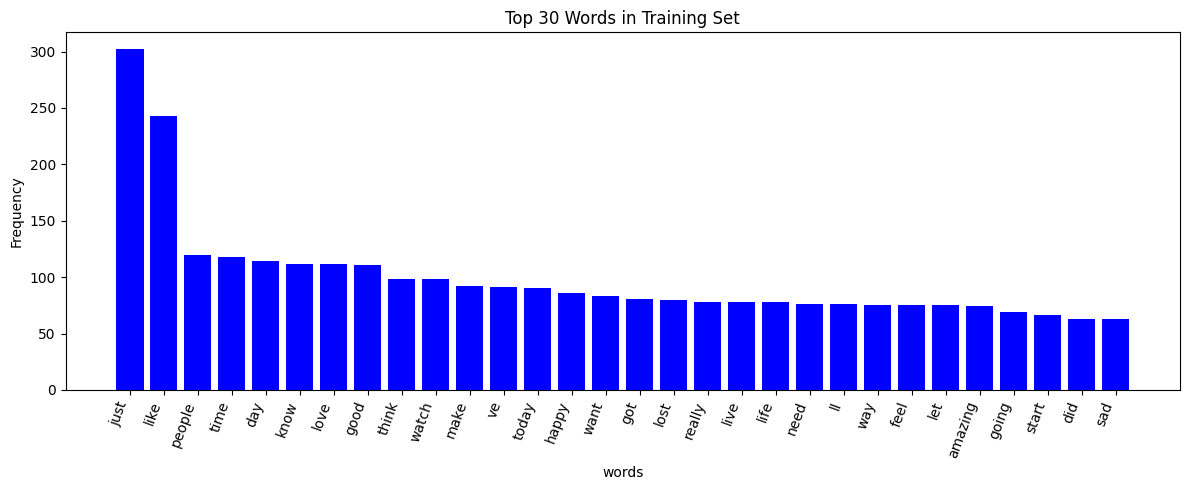

In [75]:
#plot word frequency distributions of the top 30 words in the training and test sets
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(train_word_freq_filtered['word'][:30], train_word_freq_filtered['frequency'][:30], color='blue')

plt.title('Top 30 Words in Training Set')
plt.xlabel("words")
plt.ylabel('Frequency')

plt.xticks(rotation=70, ha='right')
plt.tight_layout()

plt.show()

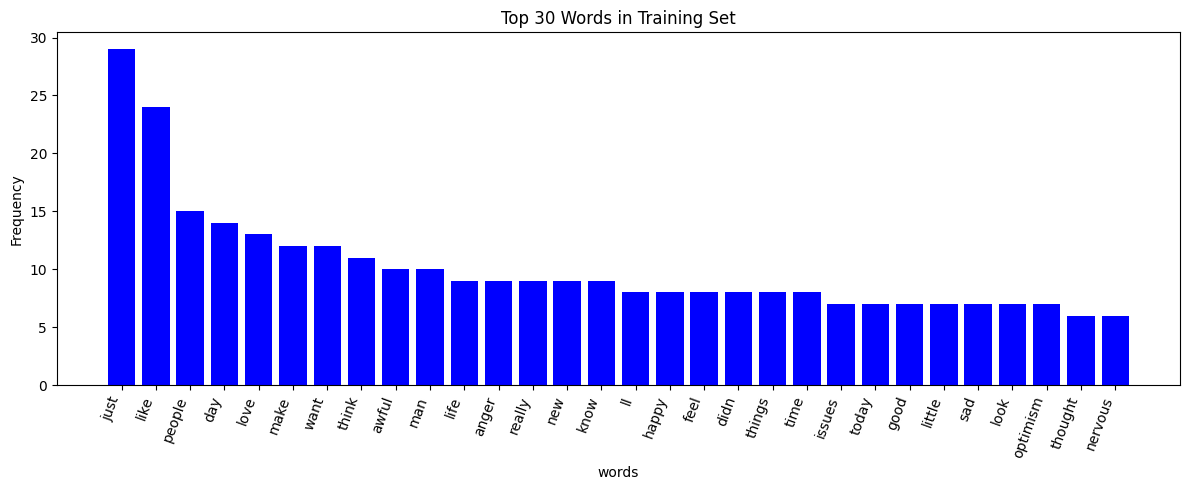

In [76]:
plt.figure(figsize=(12, 5))
plt.bar(test_word_freq_filtered['word'][:30], test_word_freq_filtered['frequency'][:30], color='blue')

plt.title('Top 30 Words in Training Set')
plt.xlabel("words")
plt.ylabel('Frequency')

plt.xticks(rotation=70, ha='right')
plt.tight_layout()

plt.show()

In [77]:
#the data still needs some cleaning as terms like 'im', 'ive', 'cant' are still present.    yes 

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [78]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [79]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [80]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

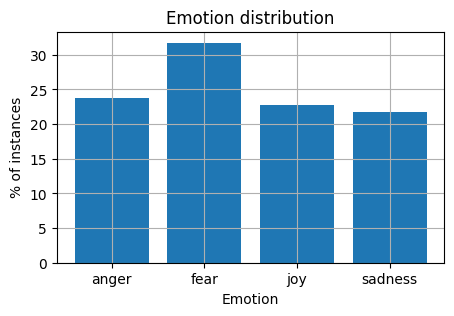

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [84]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [85]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [86]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [87]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 10115))

In [88]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [89]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [90]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [91]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [92]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 500))

In [93]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [94]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [95]:
# Answer here
#Tf-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=1000, tokenizer=nltk.word_tokenize)
tfidf_vectorizer.fit(train_df['text'])
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

train_data_tfidf_features.toarray().shape

(3613, 1000)

In [96]:
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
feature_names_tfidf[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [98]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'anger', 'anger', 'sadness', 'joy', 'fear',
       'anger', 'sadness', 'sadness'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [99]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [100]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [101]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [102]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

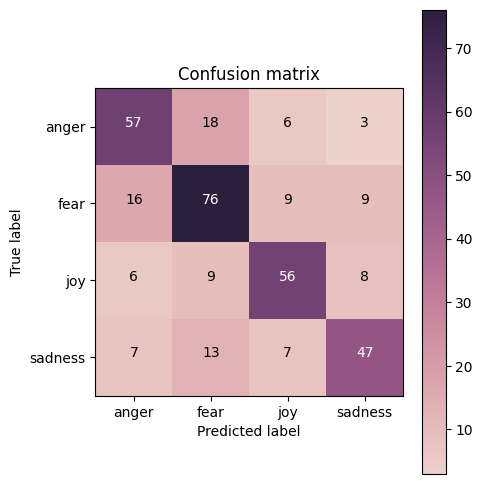

In [103]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [104]:
# Answer here
#the confusion matrix show that the model recognizes fear and anger better than joy and sadness.
#fear had the highest true positives, followed by anger. Joy and sadness had lower true positive rates, indicating that the model struggled more with accurately identifying these emotions.
#the missclassfication mostly occurred between anger, sadness and joy. Which indicates that the shared words between these emotions, the model found it difficult to distinguish them accurately.
#words  such as 'like', 'love', 'good', 'hate', 'know', 'time', 'want', 'see', 'get', 'go' are common across these emotions and may have contributed to the misclassifications.


---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [105]:

# for a classificaiton problem, you need to provide both training & testing data
X_train_tfidf = train_data_tfidf_features
y_train = train_df['emotion']   
X_test_tfidf = test_data_tfidf_features
y_test = test_df['emotion']
## take a look at data dimension is a good habit  :)
print('X_train_tfidf.shape: ', X_train_tfidf.shape)
print('y_train.shape: ', y_train.shape)
print('X_test_tfidf.shape: ', X_test_tfidf.shape)
print('y_test.shape: ', y_test.shape)   


X_train_tfidf.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test_tfidf.shape:  (347, 1000)
y_test.shape:  (347,)


In [106]:
from sklearn.naive_bayes import MultinomialNB
## build Naive Bayes model
NB_model = MultinomialNB()

NB_model = NB_model.fit(X_train_tfidf, y_train)

y_train_pred_tfidf = NB_model.predict(X_train_tfidf)
y_test_pred_tfidf = NB_model.predict(X_test_tfidf)

y_test_pred_tfidf[:10]

array(['fear', 'sadness', 'joy', 'anger', 'sadness', 'joy', 'anger',
       'sadness', 'fear', 'fear'], dtype='<U7')

In [107]:
# checking accuracy of TF-IDF based model
from sklearn.metrics import accuracy_score  
acc_train_tfidf = accuracy_score(y_true=y_train, y_pred=y_train_pred_tfidf)
acc_test_tfidf = accuracy_score(y_true=y_test, y_pred=y_test_pred_tfidf)
print('training accuracy: {}'.format(round(acc_train_tfidf, 2)))
print('testing accuracy: {}'.format(round(acc_test_tfidf, 2)))


training accuracy: 0.86
testing accuracy: 0.76


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here


---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [109]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [110]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [111]:
import keras

In [112]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4103 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [113]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3101    sadness
774       anger
1566       fear
1170       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [114]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [115]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [116]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [117]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3640 - loss: 1.3311 - val_accuracy: 0.4496 - val_loss: 1.2656
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6460 - loss: 0.9910 - val_accuracy: 0.6772 - val_loss: 0.8913
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7938 - loss: 0.5889 - val_accuracy: 0.6859 - val_loss: 0.7769
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8422 - loss: 0.4198 - val_accuracy: 0.6859 - val_loss: 0.7785
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8790 - loss: 0.3327 - val_accuracy: 0.6888 - val_loss: 0.7849
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9067 - loss: 0.2739 - val_accuracy: 0.6744 - val_loss: 0.8298
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9255 - loss: 0.2242 - val_accuracy: 0.6974 - val_loss: 0.9168
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9366 - loss: 0.1919 - val_accuracy

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [118]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[2.4438981e-07, 9.9999356e-01, 8.9468955e-07, 5.3273839e-06],
       [7.0219475e-01, 5.2134518e-02, 1.4995217e-04, 2.4552079e-01],
       [1.1107730e-02, 2.4082190e-05, 9.8883796e-01, 3.0263240e-05],
       [2.5545636e-01, 6.1508347e-03, 1.3356193e-05, 7.3837936e-01],
       [1.8477771e-02, 3.3933905e-04, 4.6632670e-07, 9.8118240e-01]],
      dtype=float32)

In [119]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'joy', 'sadness', 'sadness'], dtype=object)

In [120]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [121]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.363963,1.331115,0.449568,1.265582
1,1,0.646001,0.990997,0.677233,0.891306
2,2,0.793800,0.588935,0.685879,0.776855
3,3,0.842236,0.419828,0.685879,0.778459
4,4,0.879048,0.332723,0.688761,0.784935
5,5,0.906726,0.273854,0.674352,0.829752
6,6,0.925547,0.224161,0.697406,0.916796
7,7,0.936618,0.191913,0.697406,0.982419
8,8,0.946305,0.163517,0.674352,1.028478
9,9,0.957930,0.141960,0.680115,1.094299


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


In [122]:
# Answer here
X_train = BOW_500.transform(train_df['text'])
X_test = BOW_500.transform(test_df['text'])
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (3613, 500)
X_test.shape:  (347, 500)


In [123]:
X_train = X_train.toarray().astype('float32')
X_test = X_test.toarray().astype('float32')
print("X_tr dtype: ", X_train.dtype, "shape: ", X_train.shape)

X_tr dtype:  float32 shape:  (3613, 500)


In [124]:
print("Model input_shape: ", model.input_shape)

Model input_shape:  (None, 500)


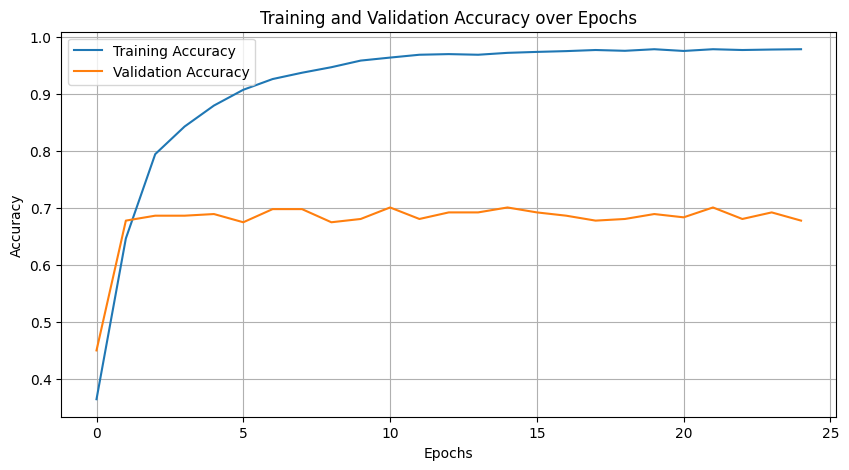

In [125]:
import matplotlib.pyplot as plt

# Training accuracy plot
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

---

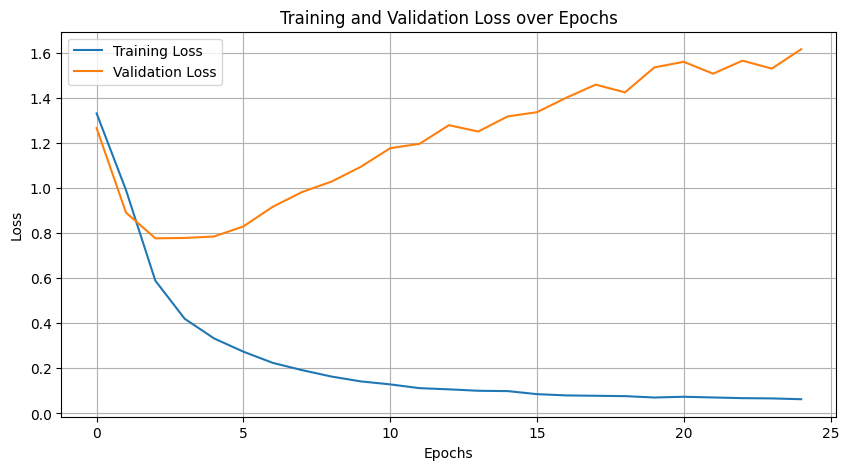

In [126]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#both the training and validation accuracy improved over epochs, indicating that the model was learning effectively from the training data.
#The training accuracy consistently increased, showing that the model was fitting the training data well.
#The validation accuracy also improved, suggesting that the model was generalizing well to unseen data.
#There were no significant signs of overfitting, as the validation accuracy did not diverge significantly from the training accuracy.
# in terms of ovverfitting, the model appears to be well-regularized, as there is no large gap between training and validation accuracy, and underfitting does not seem to be a major concern in this case.
#because both accuracies improved steadily without divergence, it suggests that the model complexity is appropriate for the dataset size and complexity.

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [127]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3101,40274,@groovydadad @MHChat 🙂ty I often conflate the ...,"[@, groovydadad, @, MHChat, 🙂ty, I, often, con..."
774,10774,Focus on yourself. Don't let other's love defi...,"[Focus, on, yourself, ., Do, n't, let, other, ..."
1566,20709,Let's not panic. Beat NYG who's atop the divis...,"[Let, 's, not, panic, ., Beat, NYG, who, 's, a..."
1170,20313,"In addition to fiction, wish me luck on my res...","[In, addition, to, fiction, ,, wish, me, luck,..."
520,10520,@AuntieSupreme @KimberlyCarole y'all found me ...,"[@, AuntieSupreme, @, KimberlyCarole, y'all, f..."


In [128]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'groovydadad', '@', 'MHChat', '🙂ty', 'I', 'often', 'conflate', 'the', 'two', 'depression', '+', 'sadness', ',', 'but', 'they', 'are', 'very', 'different', '.', 'This', 'q', 'reminded', 'me', 'of', 'that', '#', 'mhchat']),
       list(['Focus', 'on', 'yourself', '.', 'Do', "n't", 'let', 'other', "'s", 'love', 'define', 'you', 'when', 'you', "'re", 'happy', 'and', 'do', "n't", 'let', 'it', 'make', 'you', 'bitter', 'if', 'you', 'get', 'hurt', '.']),
       list(['Let', "'s", 'not', 'panic', '.', 'Beat', 'NYG', 'who', "'s", 'atop', 'the', 'division', ',', 'come', 'home', 'against', 'Cleveland', '.', 'Just', 'like', 'that', 'you', "'re", '2-2', 'with', 'a', 'division', 'win'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [130]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 4.00437564e-01,  5.42598307e-01,  2.35395995e-03, -1.90238863e-01,
       -2.30502278e-01, -1.02254307e+00,  6.48421466e-01,  9.21684742e-01,
       -1.10708304e-01, -2.67526865e-01, -1.22532696e-01, -6.10488892e-01,
       -1.24289066e-01,  1.42789379e-01, -2.34336302e-01, -4.15879071e-01,
        6.27250314e-01, -3.93601775e-01, -4.14234400e-01, -1.03070748e+00,
        4.79507893e-01,  8.55851650e-01,  1.60551846e-01,  5.12728468e-02,
        2.35934824e-01,  8.66708010e-02, -6.23920858e-01,  5.25007427e-01,
       -5.25095642e-01, -6.65002677e-04,  2.67091334e-01, -5.70919178e-03,
        1.75723866e-01, -1.07849646e+00, -2.01334655e-01,  7.38679349e-01,
        6.07775569e-01, -2.24940419e-01, -8.20103109e-01, -3.18651706e-01,
       -1.29977569e-01, -2.12752312e-01,  1.98433086e-01,  4.83220935e-01,
        5.67889929e-01, -3.86221498e-01, -6.25088990e-01,  2.91736901e-01,
        3.71612996e-01,  4.94794369e-01,  1.15484171e-01, -6.30642235e-01,
       -1.93510205e-02, -

In [131]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9177848696708679),
 ('cats', 0.9160811305046082),
 ('ukedchat', 0.915016770362854),
 ('depress', 0.9117158055305481),
 ('birthday', 0.9108365178108215),
 ('bday', 0.9099804759025574),
 ('🕋', 0.9086871147155762),
 ('kinda', 0.9054101705551147),
 ('blessed', 0.9043713808059692),
 ('dad', 0.903611421585083)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [132]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577817320823669),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150083661079407),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [134]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
#When we talk about a Words2vec or GLOVE model, we must first understand that these are pre-trained word embedding models. 
# These model are trained on larger coorpus of text data to capture semantic relationships between words. 
#These word embeddings are dense vecctor respentations where semantically similar words are mapped to promixated points in the vector space. 
# a sentence vecotor can be obtained by averaging the word vectors of all words in the sentence.
#These pre-trained models can be used as feature extractors in various NLP tasks, such as text classification, sentiment analysis, and named entity recognition.
#Becuase these models are pre-trained on large datasets, they can provide rich semantic information that can improve the performance of NLP models, especially when the available labeled data is limited.


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [136]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [137]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [138]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [139]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [140]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

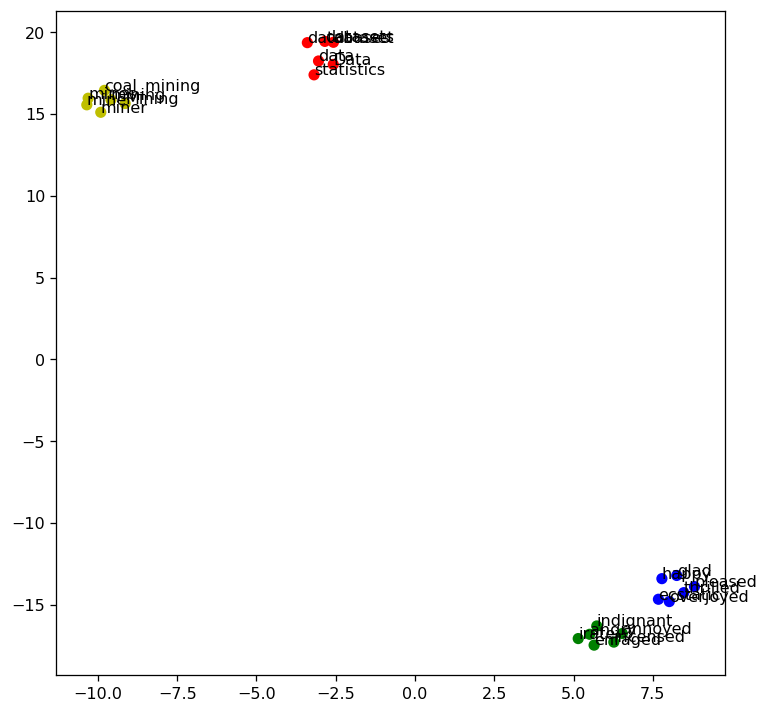

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

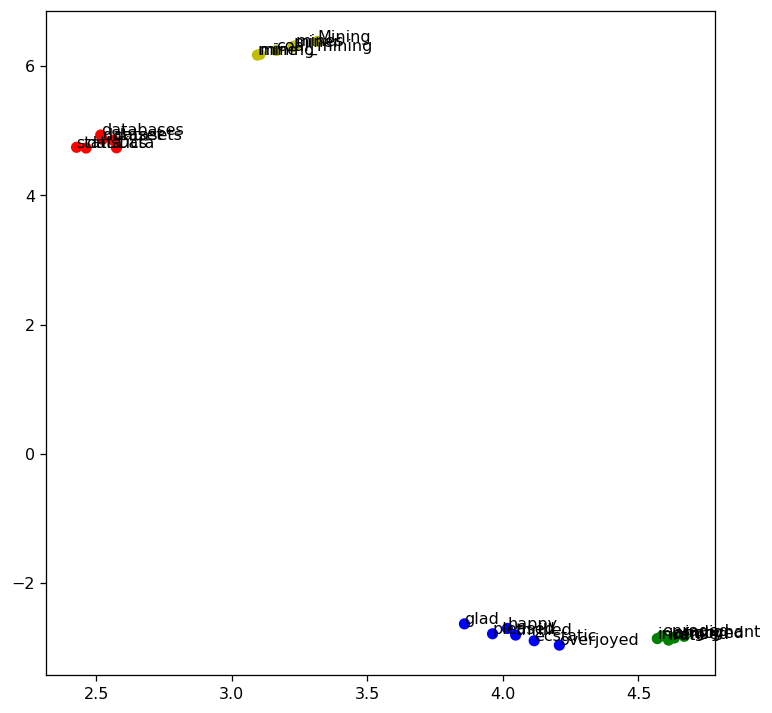

In [143]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [144]:
# Answer here
# using the pretrained model w2v_google_model to find the 15 most similar words to 'happy', 'angry', ''sad', 'fear'

target_emotions = ['happy', 'angry', 'sad', 'fear']
topn = 15

words = []

# loop through each emotion and get most similar words
for emotion in target_emotions:
    similar_words = w2v_google_model.most_similar(emotion, topn=topn)
    words.append([word for word, similarity in similar_words])

In [145]:
#extract the the target words

import numpy as np
vectors = np.array([w2v_google_model[w] for w in target_words])

In [154]:
#Apply t-SNE and UMAP to reduce dimensions

tsne_2d = TSNE (n_components=2, random_state=43, perplexity=10).fit_transform(vectors)
umap_model_2d = umap.UMAP(n_neighbors=10, min_dist=0.1,random_state=42).fit_transform(vectors)


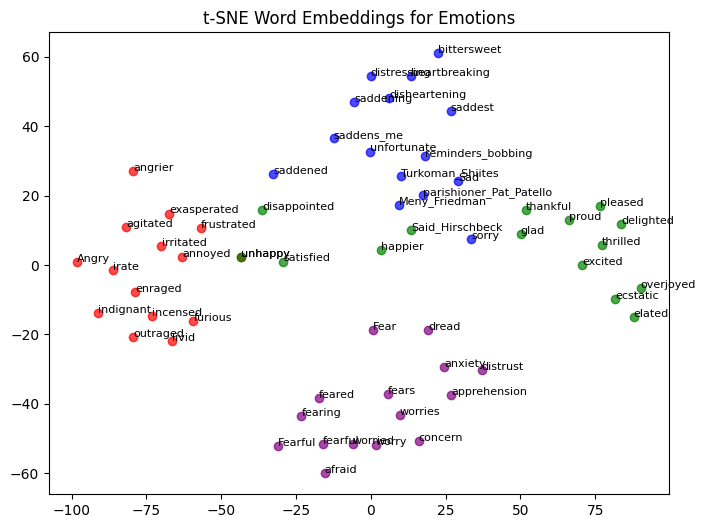

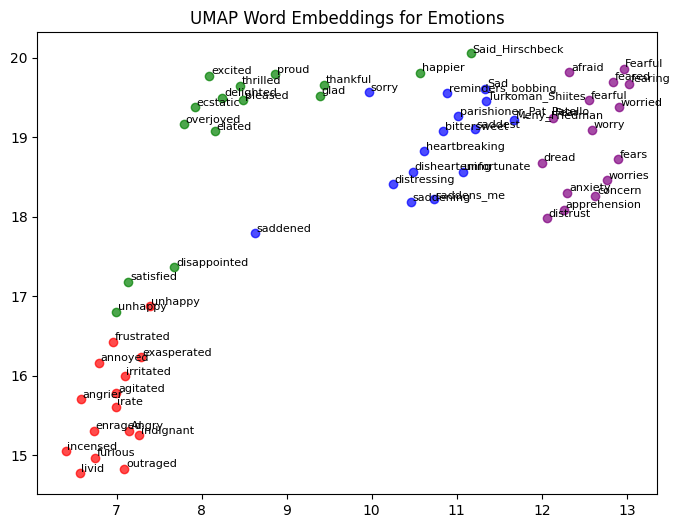

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Step 1: Get similar words
targets = ['angry', 'happy', 'sad', 'fear']
topn = 15
words, labels = [], []

for t in targets:
    for w, _ in w2v_google_model.most_similar(t, topn=topn):
        words.append(w)
        labels.append(t)

# Step 2: Get their vectors
vectors = np.array([w2v_google_model[w] for w in words])

# Step 3: Dimensionality reduction
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=10).fit_transform(vectors)
umap_2d = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42).fit_transform(vectors)

# Step 4: Plot helper
def plot_2d(coords, title):
    plt.figure(figsize=(8,6))
    colors = {'angry':'red', 'happy':'green', 'sad':'blue', 'fear':'purple'}
    for i, word in enumerate(words):
        plt.scatter(coords[i,0], coords[i,1], color=colors[labels[i]], alpha=0.7)
        plt.text(coords[i,0]+0.02, coords[i,1]+0.02, word, fontsize=8)
    plt.title(title)
    plt.show()

# Step 5: Visualize both
plot_2d(tsne_2d, "t-SNE Word Embeddings for Emotions")
plot_2d(umap_2d, "UMAP Word Embeddings for Emotions")


---

In [ ]:
# both t-sne and UMAP effectively clustered words associated with the same emotions together.
# the visualizations show distinct clusters for 'happy', 'angry', 'sad', and 'fear' words, indicating that the word embeddings capture semantic relationships well.
## however some key difference are to be noted. 
#t-sne produced tighter clusters with clearer separation between emotions, while UMAP showed more spread out clusters with some overlap.
#the t-sne emphasizes local structue, meaning it focuses on keeping small cluster intact, which is why we see tight groupings of similar words.
#UMAP, on the other hand, balances local and global structure, which can lead to more dispersed clusters that still maintain overall relationships.
#tsine is computationally more intensive and may not scale well with very large datasets, while UMAP is generally faster and can handle larger datasets more efficiently.